In [1]:
# A(인프라): (가동률 * 개수) * 면적
# 가동률: 개관일수 / 365 * 100 -> 그룹바이 mean
# 개수 -> 그룹바이 sum
# 면적 -> 그룹바이 sum
# -> 박물관 하나당 계산을 하고 지역별로 그룹바이
# B(퀄리티): 프로그램 수(없으면 1) * 유물 수

In [2]:
import pandas as pd
import numpy as np
from glob import glob

In [3]:
file_names = glob('data/*.csv')
file_names = sorted(file_names)
file_names

['data\\2021.csv',
 'data\\KC_477_DMSTC_MCST_MUSEUM_2022.csv',
 'data\\가구소득_시도__20230221112651.csv',
 'data\\전국박물관미술관정보표준데이터.csv']

In [4]:
df = pd.read_csv(file_names[1])
df

,ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,ADSTRD_CD,ADSTRD_NM,...,ARTGR_EMP_CO,PRFSN_CO,ETC_GNRL_EMP_CO,ETC_INTN_EMP_CO,PRVATE_VLNTER_CO,RM_CN,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
0,KCDMMUS22N000000001,문화시설,박물관,국립중앙박물관,서울,용산구,1117013500,용산동6가,1117069000,서빙고동,...,NaN,NaN,NaN,NaN,NaN,NaN,20220101,문화데이터총람 2022,KC_477_DMSTC_MCST_MUSEUM_2022,20220101
1,KCDMMUS22N000000002,문화시설,박물관,국립민속박물관,서울,종로구,1111011900,세종로,1111051500,청운효자동,...,NaN,NaN,NaN,NaN,NaN,NaN,20220101,문화데이터총람 2022,KC_477_DMSTC_MCST_MUSEUM_2022,20220101
2,KCDMMUS22N000000003,문화시설,박물관,"국립민속박물관 파주,(개방형 수장고 및 정보센터)",경기,파주시,4148032022,탄현면 법흥리,4148032000,탄현면,...,NaN,NaN,NaN,NaN,NaN,NaN,20220101,문화데이터총람 2022,KC_477_DMSTC_MCST_MUSEUM_2022,20220101
3,KCDMMUS22N000000004,문화시설,박물관,대한민국역사박물관,서울,종로구,1111011900,세종로,1111061500,종로1.2.3.4가동,...,NaN,NaN,NaN,NaN,NaN,NaN,20220101,문화데이터총람 2022,KC_477_DMSTC_MCST_MUSEUM_2022,20220101
4,KCDMMUS22N000000005,문화시설,박물관,국립한글박물관,서울,용산구,1117013500,용산동6가,1117069000,서빙고동,...,NaN,NaN,NaN,NaN,NaN,NaN,20220101,문화데이터총람 2022,KC_477_DMSTC_MCST_MUSEUM_2022,20220101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,KCDMMUS22N000000909,문화시설,박물관,피규어 뮤지엄제주,제주,서귀포시,5013031024,안덕면 상창리,5013031000,안덕면,...,3.0,NaN,10.0,NaN,NaN,NaN,20220101,문화데이터총람 2022,KC_477_DMSTC_MCST_MUSEUM_2022,20220101
909,KCDMMUS22N000000910,문화시설,박물관,한림공원,제주,제주시,5011025031,한림읍 협재리,5011025000,한림읍,...,2.0,7.0,39.0,NaN,NaN,NaN,20220101,문화데이터총람 2022,KC_477_DMSTC_MCST_MUSEUM_2022,20220101
910,KCDMMUS22N000000911,문화시설,박물관,헬로키티아일랜드,제주,서귀포시,5013031024,안덕면 상창리,5013031000,안덕면,...,2.0,7.0,14.0,NaN,NaN,NaN,20220101,문화데이터총람 2022,KC_477_DMSTC_MCST_MUSEUM_2022,20220101
911,KCDMMUS22N000000912,문화시설,박물관,휴애리,제주특별자치도,서귀포시,5013025329,남원읍 신례리,5013025300,남원읍,...,1.0,3.0,15.0,NaN,NaN,NaN,20220101,문화데이터총람 2022,KC_477_DMSTC_MCST_MUSEUM_2022,20220101


In [5]:
df.shape

(913, 94)

In [6]:
df.isnull().sum().sort_values()

ID                                 0
ORIGIN_NM                          0
LAST_CHG_DE                        0
CNTRCT_EMP_CO.1                    0
FILE_NM                            0
                                ... 
ETC_INTN_EMP_CO                  847
ETC_SPECL_VIEWNG_DSCNT_RT        848
CLTUR_ART_GVRNM_MANAGE_EMP_CO    852
INTN_EMP_CO                      893
RM_CN                            913
Length: 94, dtype: int64

# 전처리

## 사용할 컬럼 추출

In [7]:
# 사용할 컬럼 추출 후 df_museum에 저장
df_museum = df[['FCLTY_NM','CTPRVN_NM','SIGNGU_NM','RDNMADR_NM', 'FCLTY_LO','FCLTY_LA','FLAG_NM',
               'OPNNG_DE','TOTAR_VALUE', 'DATA_CO', 'HDCH_ARTFT_KND_CO', 'HDCH_ARTFT_CAS_CO', 'HDCH_ARTFT_CO', 'CRLTS_NM',
               'CRLTS_CO', 'PBLPRFR_CAS_CO', 'TOT_PROGRM_CO', 'PROGRM_CO',
               'FDRM_EXPRN_PROGRM_CO', 'NON_FDRM_EXPRN_PROGRM_CO', 'OUT_PROGRM_CO',
                'OPNNG_DAY_CO', 'OPNNG_TIME', 'VIEWNG_NMPR_CO', 'DAY_AVRG_VIEWNG_NMPR_CO', 'VIEWNG_PRICE',
                'NMPR_CO', 'CLTUR_ART_GVRNM_MANAGE_EMP_CO', 'CLTUR_ART_GVRNM_EMP_CO',
               'QUALF_HOLD_CO', 'CNTRCT_EMP_CO.1', 'GNRL_GVRNM_EMP_CO',
               'INTN_EMP_CO', 'PUBLIC_VLNTER_CO', 'ARTGR_EMP_CO',
               'PRFSN_CO', 'ETC_GNRL_EMP_CO', 'ETC_INTN_EMP_CO', 'PRVATE_VLNTER_CO']]

In [8]:
df_museum

,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA,FLAG_NM,OPNNG_DE,TOTAR_VALUE,DATA_CO,...,QUALF_HOLD_CO,CNTRCT_EMP_CO.1,GNRL_GVRNM_EMP_CO,INTN_EMP_CO,PUBLIC_VLNTER_CO,ARTGR_EMP_CO,PRFSN_CO,ETC_GNRL_EMP_CO,ETC_INTN_EMP_CO,PRVATE_VLNTER_CO
0,국립중앙박물관,서울,용산구,서울 용산구 서빙고로 137,126.977740,37.524702,국립,1945.12.03,"138,156","155,795",...,12.0,278,121.0,NaN,268,NaN,NaN,NaN,NaN,NaN
1,국립민속박물관,서울,종로구,서울 종로구 삼청로 37,126.978764,37.579485,국립,1946.04.25,"20,049","91,265",...,1.0,109,38.0,NaN,102,NaN,NaN,NaN,NaN,NaN
2,"국립민속박물관 파주,(개방형 수장고 및 정보센터)",경기,파주시,경기 파주시 탄현면 헤이리로 30,126.693918,37.786670,국립,2021.07.23,"10,268",NaN,...,NaN,0,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN
3,대한민국역사박물관,서울,종로구,서울 종로구 세종대로 198,126.978339,37.573714,국립,2012.12.26,"11,117","16,955",...,NaN,62,21.0,NaN,61,NaN,NaN,NaN,NaN,NaN
4,국립한글박물관,서울,용산구,서울 용산구 서빙고로 139,126.980486,37.521069,국립,2014.10.09,"11,767","26,890",...,1.0,60,23.0,NaN,65,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,피규어 뮤지엄제주,제주,서귀포시,제주특별자치도 서귀포시 안덕면 한창로 243,126.355357,33.281904,사립,2017.09.28,"1,694",130,...,NaN,0,NaN,NaN,NaN,3.0,NaN,10.0,NaN,NaN
909,한림공원,제주,제주시,제주특별자치도 제주시 한림읍 한림로 300,126.239691,33.390225,사립,1986.07.01,"4,397",식물 400,...,NaN,0,NaN,NaN,NaN,2.0,7.0,39.0,NaN,NaN
910,헬로키티아일랜드,제주,서귀포시,제주특별자치도 서귀포시 안덕면 한창로 340,126.352081,33.290100,사립,2014.01.01,"3,756",NaN,...,NaN,0,NaN,NaN,NaN,2.0,7.0,14.0,NaN,NaN
911,휴애리,제주특별자치도,서귀포시,제주특별자치도 서귀포시 남원읍 신례동로 256,126.634381,33.308535,사립,2007.05.05,220,"1,221",...,NaN,0,NaN,NaN,NaN,1.0,3.0,15.0,NaN,NaN


## 컬럼명 변경

In [9]:
df_columns = pd.read_excel('data/국내 문화체육관광 분야 박물관 시설 _컬럼정의서.xls')
df_columns

,순서,컬럼영문명,컬럼한글명,데이터타입,길이,PK여부,NOT NULL여부
0,1,ID,ID,VARCHAR,16,Y,NaN
1,2,LCLAS_NM,대분류명,VARCHAR,20,NaN,NaN
2,3,MLSFC_NM,중분류명,VARCHAR,32,NaN,NaN
3,4,FCLTY_NM,시설명,VARCHAR,30,NaN,NaN
4,5,CTPRVN_NM,시도명,VARCHAR,30,NaN,NaN
...,...,...,...,...,...,...,...
89,90,RM_CN,비고내용,VARCHAR,1000,NaN,NaN
90,91,LAST_CHG_DE,최종변경일자,VARCHAR,30,NaN,NaN
91,92,ORIGIN_NM,출처명,VARCHAR,1000,NaN,NaN
92,94,FILE_NM,파일명,VARCHAR,200,NaN,NaN


In [10]:
df_columns = df_columns[['컬럼영문명', '컬럼한글명']]
df_columns_T = df_columns.T
df_columns_T

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
컬럼영문명,ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,ADSTRD_CD,ADSTRD_NM,...,ARTGR_EMP_CO,PRFSN_CO,ETC_GNRL_EMP_CO,ETC_INTN_EMP_CO,PRVATE_VLNTER_CO,RM_CN,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
컬럼한글명,ID,대분류명,중분류명,시설명,시도명,시군구명,법정동코드,법정동명,행정동코드,행정동명,...,미술관직원수,전문직수,기타일반직원수,기타인턴직원수,민간봉사자수,비고내용,최종변경일자,출처명,파일명,기준일자


In [11]:
df_columns_T.columns = df_columns_T.iloc[0]
df_columns_T = df_columns_T.drop('컬럼영문명')
df_columns_T

컬럼영문명,ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,ADSTRD_CD,ADSTRD_NM,...,ARTGR_EMP_CO,PRFSN_CO,ETC_GNRL_EMP_CO,ETC_INTN_EMP_CO,PRVATE_VLNTER_CO,RM_CN,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
컬럼한글명,ID,대분류명,중분류명,시설명,시도명,시군구명,법정동코드,법정동명,행정동코드,행정동명,...,미술관직원수,전문직수,기타일반직원수,기타인턴직원수,민간봉사자수,비고내용,최종변경일자,출처명,파일명,기준일자


In [12]:
df_museum.head()

,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA,FLAG_NM,OPNNG_DE,TOTAR_VALUE,DATA_CO,...,QUALF_HOLD_CO,CNTRCT_EMP_CO.1,GNRL_GVRNM_EMP_CO,INTN_EMP_CO,PUBLIC_VLNTER_CO,ARTGR_EMP_CO,PRFSN_CO,ETC_GNRL_EMP_CO,ETC_INTN_EMP_CO,PRVATE_VLNTER_CO
0,국립중앙박물관,서울,용산구,서울 용산구 서빙고로 137,126.977740,37.524702,국립,1945.12.03,"138,156","155,795",...,12.0,278,121.0,NaN,268,NaN,NaN,NaN,NaN,NaN
1,국립민속박물관,서울,종로구,서울 종로구 삼청로 37,126.978764,37.579485,국립,1946.04.25,"20,049","91,265",...,1.0,109,38.0,NaN,102,NaN,NaN,NaN,NaN,NaN
2,"국립민속박물관 파주,(개방형 수장고 및 정보센터)",경기,파주시,경기 파주시 탄현면 헤이리로 30,126.693918,37.786670,국립,2021.07.23,"10,268",NaN,...,NaN,0,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN
3,대한민국역사박물관,서울,종로구,서울 종로구 세종대로 198,126.978339,37.573714,국립,2012.12.26,"11,117","16,955",...,NaN,62,21.0,NaN,61,NaN,NaN,NaN,NaN,NaN
4,국립한글박물관,서울,용산구,서울 용산구 서빙고로 139,126.980486,37.521069,국립,2014.10.09,"11,767","26,890",...,1.0,60,23.0,NaN,65,NaN,NaN,NaN,NaN,NaN


In [13]:
df_museum.columns.str.contains('CNTRCT_EMP_CO.1').sum()

1

In [14]:
li = []
for i in df_museum.columns:
    if i == 'CNTRCT_EMP_CO.1':
        li.append('계약직원수')
        continue
    if i in df_columns_T.columns:
        i = df_columns_T[i].iloc[0]
        li.append(i)
li

['시설명',
 '시도명',
 '시군구명',
 '도로명주소명',
 '시설경도',
 '시설위도',
 '구분명',
 '개관일자',
 '총면적값',
 '자료수',
 '소장유물종류수',
 '소장유물건수',
 '소장유물수',
 '문화재명',
 '문화재수',
 '공연건수',
 '총프로그램수',
 '프로그램수',
 '정기체험프로그램수',
 '비정기체험프로그램수',
 '외부프로그램수',
 '개관일수',
 '개관시간',
 '관람인원수',
 '일평균관람인원수',
 '관람금액',
 '인원수',
 '문화예술정부관리직원수',
 '문화예술정부직원수',
 '자격보유수',
 '계약직원수',
 '일반정부직원수',
 '인턴직원수',
 '공공봉사자수',
 '미술관직원수',
 '전문직수',
 '기타일반직원수',
 '기타인턴직원수',
 '민간봉사자수']

In [15]:
# 컬럼 개수 같은지 확인
len(li) == len(df_museum.columns)

True

In [16]:
df_museum.columns = li

In [17]:
df_museum.head()

,시설명,시도명,시군구명,도로명주소명,시설경도,시설위도,구분명,개관일자,총면적값,자료수,...,자격보유수,계약직원수,일반정부직원수,인턴직원수,공공봉사자수,미술관직원수,전문직수,기타일반직원수,기타인턴직원수,민간봉사자수
0,국립중앙박물관,서울,용산구,서울 용산구 서빙고로 137,126.977740,37.524702,국립,1945.12.03,"138,156","155,795",...,12.0,278,121.0,NaN,268,NaN,NaN,NaN,NaN,NaN
1,국립민속박물관,서울,종로구,서울 종로구 삼청로 37,126.978764,37.579485,국립,1946.04.25,"20,049","91,265",...,1.0,109,38.0,NaN,102,NaN,NaN,NaN,NaN,NaN
2,"국립민속박물관 파주,(개방형 수장고 및 정보센터)",경기,파주시,경기 파주시 탄현면 헤이리로 30,126.693918,37.786670,국립,2021.07.23,"10,268",NaN,...,NaN,0,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN
3,대한민국역사박물관,서울,종로구,서울 종로구 세종대로 198,126.978339,37.573714,국립,2012.12.26,"11,117","16,955",...,NaN,62,21.0,NaN,61,NaN,NaN,NaN,NaN,NaN
4,국립한글박물관,서울,용산구,서울 용산구 서빙고로 139,126.980486,37.521069,국립,2014.10.09,"11,767","26,890",...,1.0,60,23.0,NaN,65,NaN,NaN,NaN,NaN,NaN


In [18]:
df_museum.isnull().sum()

시설명              0
시도명              0
시군구명             0
도로명주소명           1
시설경도             0
시설위도             0
구분명              0
개관일자             0
총면적값             6
자료수            394
소장유물종류수         23
소장유물건수         152
소장유물수           35
문화재명           630
문화재수           627
공연건수           259
총프로그램수         229
프로그램수          542
정기체험프로그램수      410
비정기체험프로그램수     435
외부프로그램수        799
개관일수            13
개관시간            40
관람인원수           20
일평균관람인원수        69
관람금액           556
인원수            642
문화예술정부관리직원수    852
문화예술정부직원수      646
자격보유수          763
계약직원수            0
일반정부직원수        644
인턴직원수          893
공공봉사자수         751
미술관직원수         561
전문직수           744
기타일반직원수        680
기타인턴직원수        847
민간봉사자수         817
dtype: int64

In [19]:
df_museum[['총프로그램수', '프로그램수', '정기체험프로그램수', '비정기체험프로그램수', '외부프로그램수']].sample(10)

,총프로그램수,프로그램수,정기체험프로그램수,비정기체험프로그램수,외부프로그램수
678,6.0,1.0,NaN,5.0,NaN
794,11.0,NaN,11.0,NaN,NaN
629,6.0,1.0,1.0,3.0,1.0
496,NaN,NaN,NaN,NaN,NaN
495,NaN,NaN,NaN,NaN,NaN
907,1.0,NaN,NaN,1.0,NaN
819,8.0,2.0,5.0,1.0,NaN
909,NaN,NaN,NaN,NaN,NaN
272,20.0,17.0,2.0,1.0,NaN
724,NaN,NaN,NaN,NaN,NaN


In [20]:
df_museum['시도명'].value_counts()

서울         131
경기         129
강원          97
경남          77
경북          75
전남          66
충남          64
제주          50
충북          43
전북          43
부산          34
인천          30
대구          17
대전          15
광주          12
제주특별자치도     12
울산          11
세종           7
Name: 시도명, dtype: int64

In [21]:
df_museum.loc[df_museum['총프로그램수'].isnull(), '시도명'].value_counts() / df_museum['시도명'].value_counts()

강원         0.268041
경기         0.100775
경남         0.311688
경북         0.426667
광주         0.166667
대구         0.176471
대전         0.133333
부산         0.117647
서울         0.190840
세종         0.285714
울산         0.090909
인천         0.200000
전남         0.409091
전북         0.279070
제주         0.320000
제주특별자치도    0.416667
충남         0.187500
충북         0.395349
Name: 시도명, dtype: float64

In [22]:
# df_2022로 프로그램 수 결측값 채우기

In [23]:
df_2022 = pd.read_excel('data/2022.xlsx', sheet_name='박물관', header=5)
df_2022

,Unnamed: 0,시·도,시군구,국립/공립/\n사립/대학,1종/\n2종/\n미등록,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,일반직\n공무원,일반직원 정규직,계약직 등,인턴,Unnamed: 75,Unnamed: 76,"학예직 외 \n전문직 수\n(교육, \n전시 등)",일반직원,인턴.1,Unnamed: 80
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,서울,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,서울,용산구,국립,1종,국립중앙박물관,서울특별시 용산구 서빙고로 137,02-2077-9000,1945.12.03,O,...,121.0,NaN,278.0,NaN,268,NaN,NaN,NaN,NaN,NaN
4,2.0,서울,종로구,국립,1종,국립민속박물관,서울특별시 종로구 삼청로 37,02-3704-3114,1946.04.25,O,...,38.0,104,5.0,NaN,102,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,NaN,전국 총계,NaN,909,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,NaN,박물관 국립 총계,NaN,53,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,NaN,박물관 공립 총계,NaN,386,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1016,NaN,박물관 사립 총계,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_2022['프로그램\n총계\n(종)'][3:]

3       56.0
4       56.0
5        5.0
6       35.0
7       23.0
        ... 
1013     NaN
1014     NaN
1015     NaN
1016     NaN
1017     NaN
Name: 프로그램\n총계\n(종), Length: 1015, dtype: float64

In [25]:
df_2022_museum = pd.read_excel('data/2022.xlsx', sheet_name='박물관', header=4)
df_2022_museum['박물관명']

0           NaN
1           NaN
2           NaN
3           NaN
4       국립중앙박물관
         ...   
1014        NaN
1015        NaN
1016        NaN
1017        NaN
1018        NaN
Name: 박물관명, Length: 1019, dtype: object

In [26]:
df_2022_museum['박물관명'] = df_2022_museum['박물관명'][4:]

In [27]:
df_program = pd.DataFrame()

In [28]:
df_program['박물관명'] = df_2022_museum['박물관명']
df_program['프로그램수'] = df_2022['프로그램\n총계\n(종)'][3:]

In [29]:
df_program['박물관이름'] = 0
from tqdm import tqdm
for i in tqdm(range(3, len(df_program)-1)):
    df_program['박물관이름'].iloc[i] = df_program['박물관명'].iloc[i+1]

  0%|                                                                                         | 0/1015 [00:00<?, ?it/s]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_223672\516183045.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_program['박물관이름'].iloc[i] = df_program['박물관명'].iloc[i+1]
100%|████████████████████████████████████████████████████████████████████████████| 1015/1015 [00:00<00:00, 5702.19it/s]


In [30]:
df_program = df_program.drop('박물관명', axis=1)
df_program

,프로그램수,박물관이름
0,NaN,0
1,NaN,0
2,NaN,0
3,56.0,국립중앙박물관
4,56.0,국립민속박물관
...,...,...
1014,NaN,NaN
1015,NaN,NaN
1016,NaN,NaN
1017,NaN,NaN


In [31]:
df_program = df_program[df_program['박물관이름'].notnull()]
df_program

,프로그램수,박물관이름
0,NaN,0
1,NaN,0
2,NaN,0
3,56.0,국립중앙박물관
4,56.0,국립민속박물관
...,...,...
1006,NaN,한림공원
1007,5.0,헬로키티아일랜드
1008,12.0,휴애리
1010,4.0,제주대학교 박물관


In [32]:
df_merge = pd.merge(df_museum, df_program, how='inner', left_on='시설명', right_on='박물관이름')
df_merge

,시설명,시도명,시군구명,도로명주소명,시설경도,시설위도,구분명,개관일자,총면적값,자료수,...,일반정부직원수,인턴직원수,공공봉사자수,미술관직원수,전문직수,기타일반직원수,기타인턴직원수,민간봉사자수,프로그램수_y,박물관이름
0,국립중앙박물관,서울,용산구,서울 용산구 서빙고로 137,126.977740,37.524702,국립,1945.12.03,"138,156","155,795",...,121.0,NaN,268,NaN,NaN,NaN,NaN,NaN,56.0,국립중앙박물관
1,국립민속박물관,서울,종로구,서울 종로구 삼청로 37,126.978764,37.579485,국립,1946.04.25,"20,049","91,265",...,38.0,NaN,102,NaN,NaN,NaN,NaN,NaN,56.0,국립민속박물관
2,대한민국역사박물관,서울,종로구,서울 종로구 세종대로 198,126.978339,37.573714,국립,2012.12.26,"11,117","16,955",...,21.0,NaN,61,NaN,NaN,NaN,NaN,NaN,35.0,대한민국역사박물관
3,국립한글박물관,서울,용산구,서울 용산구 서빙고로 139,126.980486,37.521069,국립,2014.10.09,"11,767","26,890",...,23.0,NaN,65,NaN,NaN,NaN,NaN,NaN,23.0,국립한글박물관
4,국립국악원 국악박물관,서울,서초구,서울 서초구 남부순환로 2364,127.009818,37.477719,국립,1995.02.23,"3,899","도서 23953,비도서 53120,특수자료 15000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,국립국악원 국악박물관
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,토이파크뮤지엄,제주특별자치도,서귀포시,제주특별자치도 서귀포시 안덕면 동광로 267-7,126.345363,33.318960,사립,2011.06.14,"1,077",150,...,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN,1.0,토이파크뮤지엄
901,피규어 뮤지엄제주,제주,서귀포시,제주특별자치도 서귀포시 안덕면 한창로 243,126.355357,33.281904,사립,2017.09.28,"1,694",130,...,NaN,NaN,NaN,3.0,NaN,10.0,NaN,NaN,3.0,피규어 뮤지엄제주
902,한림공원,제주,제주시,제주특별자치도 제주시 한림읍 한림로 300,126.239691,33.390225,사립,1986.07.01,"4,397",식물 400,...,NaN,NaN,NaN,2.0,7.0,39.0,NaN,NaN,NaN,한림공원
903,헬로키티아일랜드,제주,서귀포시,제주특별자치도 서귀포시 안덕면 한창로 340,126.352081,33.290100,사립,2014.01.01,"3,756",NaN,...,NaN,NaN,NaN,2.0,7.0,14.0,NaN,NaN,5.0,헬로키티아일랜드


In [33]:
df_merge[['시설명', '총프로그램수', '박물관이름','프로그램수_y']].sample(10)

,시설명,총프로그램수,박물관이름,프로그램수_y
280,시흥오이도박물관,47.0,시흥오이도박물관,47.0
684,와보랑께박물관,NaN,와보랑께박물관,NaN
586,국립무형유산원,15.0,국립무형유산원,15.0
608,어진박물관,10.0,어진박물관,10.0
175,자연염색박물관,4.0,자연염색박물관,4.0
234,한남대학교 자연사박물관,2.0,한남대학교 자연사박물관,2.0
367,허브아일랜드식물원,8.0,허브아일랜드식물원,8.0
701,김천시립박물관,1.0,김천시립박물관,1.0
166,대구근대역사관,2.0,대구근대역사관,2.0
239,울산박물관,51.0,울산박물관,51.0


In [34]:
df_merge.isnull().sum()

시설명              0
시도명              0
시군구명             0
도로명주소명           1
시설경도             0
시설위도             0
구분명              0
개관일자             0
총면적값             6
자료수            387
소장유물종류수         23
소장유물건수         149
소장유물수           34
문화재명           622
문화재수           619
공연건수           256
총프로그램수         225
프로그램수_x        535
정기체험프로그램수      405
비정기체험프로그램수     431
외부프로그램수        793
개관일수            12
개관시간            38
관람인원수           18
일평균관람인원수        67
관람금액           552
인원수            633
문화예술정부관리직원수    844
문화예술정부직원수      637
자격보유수          754
계약직원수            0
일반정부직원수        636
인턴직원수          885
공공봉사자수         745
미술관직원수         559
전문직수           740
기타일반직원수        675
기타인턴직원수        841
민간봉사자수         809
프로그램수_y        225
박물관이름            0
dtype: int64

In [35]:
## 2021.csv 파일로 결측치 못 채움

## 결측값 처리
- 결측값이 너무 많은 컬럼 삭제

In [36]:
df_museum.shape

(913, 39)

In [37]:
df_museum.shape[0] * 0.5

456.5

In [38]:
df_museum.columns

Index(['시설명', '시도명', '시군구명', '도로명주소명', '시설경도', '시설위도', '구분명', '개관일자', '총면적값',
       '자료수', '소장유물종류수', '소장유물건수', '소장유물수', '문화재명', '문화재수', '공연건수', '총프로그램수',
       '프로그램수', '정기체험프로그램수', '비정기체험프로그램수', '외부프로그램수', '개관일수', '개관시간', '관람인원수',
       '일평균관람인원수', '관람금액', '인원수', '문화예술정부관리직원수', '문화예술정부직원수', '자격보유수', '계약직원수',
       '일반정부직원수', '인턴직원수', '공공봉사자수', '미술관직원수', '전문직수', '기타일반직원수', '기타인턴직원수',
       '민간봉사자수'],
      dtype='object')

In [39]:
df_museum = df_museum[['시설명', '시도명', '시군구명', '도로명주소명', '시설경도', '시설위도', 
                       '구분명', '개관일자', '총면적값', '총프로그램수', '소장유물종류수', '소장유물건수', 
                       '소장유물수', '개관일수', '개관시간', '관람인원수',
                       '일평균관람인원수', '계약직원수']]
df_museum

,시설명,시도명,시군구명,도로명주소명,시설경도,시설위도,구분명,개관일자,총면적값,총프로그램수,소장유물종류수,소장유물건수,소장유물수,개관일수,개관시간,관람인원수,일평균관람인원수,계약직원수
0,국립중앙박물관,서울,용산구,서울 용산구 서빙고로 137,126.977740,37.524702,국립,1945.12.03,"138,156",56.0,"금속, 토제, 도자기, 서화 등","202,906","413,137",360,10:00-18:00,"1,262,562","3,507",278
1,국립민속박물관,서울,종로구,서울 종로구 삼청로 37,126.978764,37.579485,국립,1946.04.25,"20,049",56.0,"의식주, 생업 등 생활사 자료","109,255","169,873",314,"09:00-18:00,(단, 동절기인 11월~2월은 9","401,064","1,277",109
2,"국립민속박물관 파주,(개방형 수장고 및 정보센터)",경기,파주시,경기 파주시 탄현면 헤이리로 30,126.693918,37.786670,국립,2021.07.23,"10,268",5.0,"의식주, 생업 등 생활사 자료",NaN,NaN,206,10:00-18:00,"29,479",143,0
3,대한민국역사박물관,서울,종로구,서울 종로구 세종대로 198,126.978339,37.573714,국립,2012.12.26,"11,117",35.0,"문서 및 전적, 사진, 생활용품 등","101,941","155,248",341,10:00-18:00,"91,296",268,62
4,국립한글박물관,서울,용산구,서울 용산구 서빙고로 139,126.980486,37.521069,국립,2014.10.09,"11,767",23.0,"한글서적, 문서, 예술, 생활, 정보화 자료","26,044","81,315",345,10:00-18:00,"110,074",319,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,피규어 뮤지엄제주,제주,서귀포시,제주특별자치도 서귀포시 안덕면 한창로 243,126.355357,33.281904,사립,2017.09.28,"1,694",3.0,피규어,"1,600","3,150",365,10:00-18:00,"105,000",288,0
909,한림공원,제주,제주시,제주특별자치도 제주시 한림읍 한림로 300,126.239691,33.390225,사립,1986.07.01,"4,397",NaN,식물,"2,400","100,000",365,09:00-18:00,"268,649",736,0
910,헬로키티아일랜드,제주,서귀포시,제주특별자치도 서귀포시 안덕면 한창로 340,126.352081,33.290100,사립,2014.01.01,"3,756",5.0,"인형, 지갑외 전시작품, 미술작품",190,190,365,09:00-18:00,"106,622",292,0
911,휴애리,제주특별자치도,서귀포시,제주특별자치도 서귀포시 남원읍 신례동로 256,126.634381,33.308535,사립,2007.05.05,220,12.0,"식물(진달래과),회화조각 도자기","진달래93과,",23,365,09:00-18:00,NaN,NaN,0


In [40]:
df_museum.isnull().sum()

시설명           0
시도명           0
시군구명          0
도로명주소명        1
시설경도          0
시설위도          0
구분명           0
개관일자          0
총면적값          6
총프로그램수      229
소장유물종류수      23
소장유물건수      152
소장유물수        35
개관일수         13
개관시간         40
관람인원수        20
일평균관람인원수     69
계약직원수         0
dtype: int64

In [41]:
df_museum['소장유물수'].isnull().sum()

35

In [42]:
df_museum[df_museum['소장유물수'].isnull()]

,시설명,시도명,시군구명,도로명주소명,시설경도,시설위도,구분명,개관일자,총면적값,총프로그램수,소장유물종류수,소장유물건수,소장유물수,개관일수,개관시간,관람인원수,일평균관람인원수,계약직원수
2,"국립민속박물관 파주,(개방형 수장고 및 정보센터)",경기,파주시,경기 파주시 탄현면 헤이리로 30,126.693918,37.786670,국립,2021.07.23,"10,268",5.0,"의식주, 생업 등 생활사 자료",NaN,NaN,206,10:00-18:00,"29,479",143,0
68,쇳대박물관(휴관),서울,종로구,서울 종로구 이화장길 100,127.004617,37.579804,사립,2003.11.05,342,NaN,"자물쇠, 빗장, 민속품, 토기류",NaN,NaN,NaN,NaN,NaN,NaN,0
147,범어사 성보관,부산,금정구,부산 금정구 범어사로 296,129.074401,35.278407,사립,2021.11.16,"2,959",1.0,"서화, 전적, 책판, 금속, 토도 등","3,377(2관 전체)",NaN,39,10:00-15:00,"1,322",34,0
174,농경생활사박물관(휴관),대구,달성군,대구 달성군 가창면 가창로 1003,128.625579,35.793020,사립,1978.08.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
248,충렬공박제상기념관,울산,울주군,울산 울주군 두동면 박제상로 200,129.229689,35.654868,공립,2008.09.19,946,NaN,NaN,NaN,NaN,309,09:30-17:30,"17,950",58,3
257,한국여인생활사박물관,세종,세종,세종특별자치시 조치원읍 안터길 107,127.287278,36.629767,사립,2015.11.01,240,6.0,"민속품, 토기, 도자기, 목가구",NaN,NaN,309,09:00-18:00,400,1,0
332,신영숙컬렉션박물관,경기,용인시,경기 용인시 기흥구 흥덕4로 63,127.090112,37.277306,사립,2013.08.01,"2,500",NaN,NaN,NaN,NaN,휴관,NaN,휴관,NaN,0
362,피노지움,경기,파주시,경기 파주시 회동길 152,126.687563,37.708907,사립,2013.10.01,"3,667",NaN,NaN,NaN,NaN,휴관,NaN,휴관,NaN,0
426,파로호 안보전시관,강원,화천군,강원도 화천군 간동면 구만리 산61-2,127.771325,38.094746,공립,2006.01.02,434,NaN,총기류(대여),NaN,NaN,160,09:00-18:00,"3,578",22,2
442,금강산자연사박물관(휴관),강원,고성군,강원 고성군 현내면 동해대로 7961,128.422432,38.472009,사립,2003.04.06,NaN,NaN,NaN,NaN,NaN,휴관,NaN,휴관,NaN,0


In [43]:
df_museum[df_museum['소장유물수'] == '0'].shape[0]
# 0인 값이 없으므로 결측값을 0으로 대체?
# 소장유물건수로 채우고 그래도 없다면 0으로 대체

0

In [44]:
# 소장유물건수로 채우기 -> 해당 없음
df_museum.loc[(df_museum['소장유물수'].isnull()) & (df_museum['소장유물수'].notnull()), ['소장유물종류수', '소장유물건수', '소장유물수']]

,소장유물종류수,소장유물건수,소장유물수


In [45]:
df_museum.loc[df_museum['소장유물수'].isnull(), '소장유물수'] = 0

In [46]:
df_museum.isnull().sum()

시설명           0
시도명           0
시군구명          0
도로명주소명        1
시설경도          0
시설위도          0
구분명           0
개관일자          0
총면적값          6
총프로그램수      229
소장유물종류수      23
소장유물건수      152
소장유물수         0
개관일수         13
개관시간         40
관람인원수        20
일평균관람인원수     69
계약직원수         0
dtype: int64

In [47]:
df_museum = df_museum.drop('소장유물건수', axis=1)

In [48]:
df_museum[['관람인원수','개관일수','일평균관람인원수']].sample(10)

,관람인원수,개관일수,일평균관람인원수
755,"11,979",251,48
173,"15,648",311,50
187,"17,297",311,56
303,"8,414",311,27
375,"1,680",61,28
258,"12,842",290,44
46,"7,975",208,38
126,"20,463",248,83
73,"12,177",291,42
101,"1,041",180,6


In [49]:
# 일평균관람인원수 = 관람인원수 / 개관일수

In [50]:
df_museum = df_museum[(df_museum['관람인원수'].notnull())]
df_museum.isnull().sum()

시설명           0
시도명           0
시군구명          0
도로명주소명        1
시설경도          0
시설위도          0
구분명           0
개관일자          0
총면적값          5
총프로그램수      216
소장유물종류수      21
소장유물수         0
개관일수          0
개관시간         28
관람인원수         0
일평균관람인원수     53
계약직원수         0
dtype: int64

In [51]:
df_museum

,시설명,시도명,시군구명,도로명주소명,시설경도,시설위도,구분명,개관일자,총면적값,총프로그램수,소장유물종류수,소장유물수,개관일수,개관시간,관람인원수,일평균관람인원수,계약직원수
0,국립중앙박물관,서울,용산구,서울 용산구 서빙고로 137,126.977740,37.524702,국립,1945.12.03,"138,156",56.0,"금속, 토제, 도자기, 서화 등","413,137",360,10:00-18:00,"1,262,562","3,507",278
1,국립민속박물관,서울,종로구,서울 종로구 삼청로 37,126.978764,37.579485,국립,1946.04.25,"20,049",56.0,"의식주, 생업 등 생활사 자료","169,873",314,"09:00-18:00,(단, 동절기인 11월~2월은 9","401,064","1,277",109
2,"국립민속박물관 파주,(개방형 수장고 및 정보센터)",경기,파주시,경기 파주시 탄현면 헤이리로 30,126.693918,37.786670,국립,2021.07.23,"10,268",5.0,"의식주, 생업 등 생활사 자료",0,206,10:00-18:00,"29,479",143,0
3,대한민국역사박물관,서울,종로구,서울 종로구 세종대로 198,126.978339,37.573714,국립,2012.12.26,"11,117",35.0,"문서 및 전적, 사진, 생활용품 등","155,248",341,10:00-18:00,"91,296",268,62
4,국립한글박물관,서울,용산구,서울 용산구 서빙고로 139,126.980486,37.521069,국립,2014.10.09,"11,767",23.0,"한글서적, 문서, 예술, 생활, 정보화 자료","81,315",345,10:00-18:00,"110,074",319,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,토이파크뮤지엄,제주특별자치도,서귀포시,제주특별자치도 서귀포시 안덕면 동광로 267-7,126.345363,33.318960,사립,2011.06.14,"1,077",1.0,"장난감,인형,","2,650",365,09:00-20:00,"25,000",68,0
908,피규어 뮤지엄제주,제주,서귀포시,제주특별자치도 서귀포시 안덕면 한창로 243,126.355357,33.281904,사립,2017.09.28,"1,694",3.0,피규어,"3,150",365,10:00-18:00,"105,000",288,0
909,한림공원,제주,제주시,제주특별자치도 제주시 한림읍 한림로 300,126.239691,33.390225,사립,1986.07.01,"4,397",NaN,식물,"100,000",365,09:00-18:00,"268,649",736,0
910,헬로키티아일랜드,제주,서귀포시,제주특별자치도 서귀포시 안덕면 한창로 340,126.352081,33.290100,사립,2014.01.01,"3,756",5.0,"인형, 지갑외 전시작품, 미술작품",190,365,09:00-18:00,"106,622",292,0


In [52]:
df_museum.loc[df_museum['관람인원수'].str.contains('휴관'), :]

,시설명,시도명,시군구명,도로명주소명,시설경도,시설위도,구분명,개관일자,총면적값,총프로그램수,소장유물종류수,소장유물수,개관일수,개관시간,관람인원수,일평균관람인원수,계약직원수
12,국회 헌정기념관,서울,영등포구,서울 영등포구 의사당대로 1,126.916404,37.532912,국립,1998.05.29,"8,464",NaN,"문서류, 미술픔, 기념품 등","19,676",휴관,NaN,휴관,NaN,18
28,손기정기념관,서울,중구,서울 중구 손기정로 101,126.964816,37.555479,공립,2012.10.14,"1,600",4.0,"근현대 자료(금속, 의류, 지류, 목조류 등)","5,540",임시휴관(코로나/내부공사),09:00-18:00,임시휴관,NaN,4
63,샬트르 성바오로수녀회 역사박물관,서울,중구,서울 중구 명동길 74-2,126.987827,37.562228,사립,2004.06.26,622,NaN,"교회역사자료(문서,제구,의류 등)","2,655",휴관,09:30-16:30,휴관,NaN,0
64,서울대학교병원 의학박물관(휴관),서울,종로구,서울 종로구 대학로 101,126.997196,37.580452,사립,1992.04.06,"1,270",NaN,"근대 의료사 관련 문서, 도서, 의료기기","4,130",휴관,NaN,휴관,NaN,0
67,세계장신구박물관,서울,종로구,서울 종로구 북촌로5나길 2,126.981806,37.580977,사립,2004.05.12,195,NaN,"공예품, 고고, 민속품 등","1,000",휴관,NaN,휴관,NaN,0
145,록봉민속교육박물관,부산,강서구,부산 강서구 가덕해안로 741,128.813583,35.031530,사립,2011.11.26,982,20.0,민속자료,"7,000",휴관,10:00-18:00,휴관,NaN,0
146,범어사 성보박물관,부산,금정구,부산 금정구 범어사로 250,129.067621,35.283043,사립,2003.03.26,485,1.0,"서화, 전적, 책판, 금속, 토도 등","34,317",휴관,휴관,휴관,NaN,0
152,증권박물관(부산관),부산,남구,부산 남구 전포대로 133,129.065472,35.148282,사립,2019.12.09,"2,728",5.0,국내외 증권 자료 등,"1,723",휴관,10:00-17:00,휴관,NaN,0
153,한국거래소 자본시장역사박물관,부산,남구,부산 남구 문현금융로 40,129.065855,35.146492,사립,2019.04.04,"2,063",22.0,근현대 금융사(자본시장) 관련 유물 등,"5,739",휴관,09:00-18:00,휴관,NaN,0
160,부산과학기술대학교 민속자료실 박물관,부산,북구,부산 북구 시랑로132번길 88,129.005303,35.194195,대학,1993.11.12,321,NaN,"금속, 자기, 토기, 민속자료 등","2,737",휴관,x,휴관,NaN,0


In [53]:
df_museum = df_museum[(~df_museum['관람인원수'].str.contains('휴관')) & (df_museum['관람인원수'] != '-')]
df_museum.isnull().sum()

시설명           0
시도명           0
시군구명          0
도로명주소명        1
시설경도          0
시설위도          0
구분명           0
개관일자          0
총면적값          1
총프로그램수      177
소장유물종류수      12
소장유물수         0
개관일수          0
개관시간          3
관람인원수         0
일평균관람인원수      0
계약직원수         0
dtype: int64

In [54]:
df_museum.isnull().sum()

시설명           0
시도명           0
시군구명          0
도로명주소명        1
시설경도          0
시설위도          0
구분명           0
개관일자          0
총면적값          1
총프로그램수      177
소장유물종류수      12
소장유물수         0
개관일수          0
개관시간          3
관람인원수         0
일평균관람인원수      0
계약직원수         0
dtype: int64

In [55]:
df_museum = df_museum.drop(['소장유물종류수', '개관시간'], axis=1)

In [56]:
df_museum.isnull().sum()

시설명           0
시도명           0
시군구명          0
도로명주소명        1
시설경도          0
시설위도          0
구분명           0
개관일자          0
총면적값          1
총프로그램수      177
소장유물수         0
개관일수          0
관람인원수         0
일평균관람인원수      0
계약직원수         0
dtype: int64

In [57]:
df_museum.loc[df_museum['총프로그램수'].isnull(), '총프로그램수'] = 0

In [58]:
df_museum['총프로그램수'] += 1
df_museum['총프로그램수']

0      57.0
1      57.0
2       6.0
3      36.0
4      24.0
       ... 
907     2.0
908     4.0
909     1.0
910     6.0
912     5.0
Name: 총프로그램수, Length: 835, dtype: float64

In [59]:
df_museum.to_csv('박물관_전처리완료.csv', index=False)

In [60]:
df_museum = df_museum[['시도명', '시설명', '총면적값', '총프로그램수', '소장유물수', '개관일수']]

## 시도별 박물관 면적 합계
- 총면적값 데이터 사용

In [61]:
df_museum.columns[df_museum.columns.str.contains('면적')]

Index(['총면적값'], dtype='object')

In [62]:
# 컬럼 타입 변경
df_museum['총면적값'] = df_museum['총면적값'].str.replace(',','')

In [63]:
df_museum['총면적값'] = df_museum['총면적값'].astype(float)

## 시도별 박물관 소장 유물 수 합계 

In [64]:
df_museum.columns[df_museum.columns.str.contains('유물')]

Index(['소장유물수'], dtype='object')

In [65]:
# 컬럼 타입 변경
df_museum['소장유물수'] = df_museum['소장유물수'].str.replace(',','')

In [66]:
df_museum = df_museum[df_museum['소장유물수'].notnull()] # 22개
df_museum.shape

(813, 6)

In [67]:
df_museum = df_museum[(df_museum['소장유물수'] != '본관등록')]

In [68]:
df_museum.isnull().sum()

시도명       0
시설명       0
총면적값      1
총프로그램수    0
소장유물수     0
개관일수      0
dtype: int64

In [69]:
df_museum['소장유물수'] = df_museum['소장유물수'].astype(int)

In [70]:
df_museum['소장유물수'].head()

0    413137
1    169873
3    155248
4     81315
5     28227
Name: 소장유물수, dtype: int32

## 프로그램 수

In [71]:
df_museum['총프로그램수'].isnull().sum()

0

## 개관일수

In [72]:
df_museum['개관일수'].isnull().sum()

0

## 가동률

In [73]:
df_museum.head()

,시도명,시설명,총면적값,총프로그램수,소장유물수,개관일수
0,서울,국립중앙박물관,138156.0,57.0,413137,360
1,서울,국립민속박물관,20049.0,57.0,169873,314
3,서울,대한민국역사박물관,11117.0,36.0,155248,341
4,서울,국립한글박물관,11767.0,24.0,81315,345
5,서울,국립국악원 국악박물관,3899.0,5.0,28227,296


In [74]:
df_museum['개관일수'].dtypes

dtype('O')

In [75]:
df_museum['개관일수'].unique()

array(['360', '314', '341', '345', '296', '279', '176', '343', '50',
       '247', '293', '300', '200', '280', '310', '311', '285', '312',
       '291', '324', '142', '303', '302', '309', '297', '274', '292',
       '305', '135', '227', '120', '228', '287', '230', '208', '304',
       '365', '180', '239', '210', '190', '290', '347', '136', '246',
       '270', '276', '298', '299', '45', '240', '184', '289', '295',
       '254', '244', '243', '193', '306', '1', '90', '111', '237', '150',
       '211', '110일(2-8월 휴관)', '158', '35', '121', '205', '250', '41',
       '10', '248', '252', '70', '261', '130', '264', '313', '253', '249',
       '87', '154', '20', '215', '283', '271', '308', '204', '145', '183',
       '316', '307', '231', '220', '115', '260', '80', '100', '75', '362',
       '301', '257', '265', '255', '96', '234', '269', '225', '125',
       '229', '19', '258', '320', '354', '226', '282', '262', '165',
       '272', '238', '321', '322', '352', '286', '162', '152', '318',
    

In [76]:
df_museum['개관일수'] = df_museum['개관일수'].str.replace(r'[ㄱ-ㅣ가-힣]', '', regex=True)
df_museum['개관일수'] = df_museum['개관일수'].str.replace(r'\([^)]*\)', '', regex=True)
df_museum['개관일수'] = df_museum['개관일수'].astype(int)

In [77]:
df_museum['개관일수'].dtypes

dtype('int32')

In [78]:
df_museum['가동률'] = df_museum['개관일수'] / 365 * 100
df_museum.head()

,시도명,시설명,총면적값,총프로그램수,소장유물수,개관일수,가동률
0,서울,국립중앙박물관,138156.0,57.0,413137,360,98.630137
1,서울,국립민속박물관,20049.0,57.0,169873,314,86.027397
3,서울,대한민국역사박물관,11117.0,36.0,155248,341,93.424658
4,서울,국립한글박물관,11767.0,24.0,81315,345,94.520548
5,서울,국립국악원 국악박물관,3899.0,5.0,28227,296,81.095890


# 지수 만들기

In [79]:
df_museum.head()

,시도명,시설명,총면적값,총프로그램수,소장유물수,개관일수,가동률
0,서울,국립중앙박물관,138156.0,57.0,413137,360,98.630137
1,서울,국립민속박물관,20049.0,57.0,169873,314,86.027397
3,서울,대한민국역사박물관,11117.0,36.0,155248,341,93.424658
4,서울,국립한글박물관,11767.0,24.0,81315,345,94.520548
5,서울,국립국악원 국악박물관,3899.0,5.0,28227,296,81.095890


In [80]:
df_museum.loc[df_museum['시도명'] == '서울특별시', '시도명'] = '서울'
df_museum.loc[df_museum['시도명'] == '경기도', '시도명'] = '경기'
df_museum.loc[df_museum['시도명'] == '대구광역시', '시도명'] = '대구'
df_museum.loc[df_museum['시도명'] == '인천광역시', '시도명'] = '인천'
df_museum.loc[df_museum['시도명'] == '제주특별자치도', '시도명'] = '제주'
df_museum.loc[df_museum['시도명'] == '부산광역시', '시도명'] = '부산'
df_museum.loc[df_museum['시도명'] == '대전광역시', '시도명'] = '대전'
df_museum.loc[df_museum['시도명'] == '경상북도', '시도명'] = '경북'
df_museum.loc[df_museum['시도명'] == '경상남도', '시도명'] = '경남'
df_museum.loc[df_museum['시도명'] == '광주광역시', '시도명'] = '광주'
df_museum.loc[df_museum['시도명'] == '울산광역시', '시도명'] = '울산'
df_museum.loc[df_museum['시도명'] == '강원도', '시도명'] = '강원'
df_museum.loc[df_museum['시도명'] == '전라북도', '시도명'] = '전북'
df_museum.loc[df_museum['시도명'] == '충청북도', '시도명'] = '충북'
df_museum.loc[df_museum['시도명'] == '전라남도', '시도명'] = '전남'
df_museum.loc[df_museum['시도명'] == '충청남도', '시도명'] = '충남'
df_museum.loc[df_museum['시도명'] == '세종특별자치시', '시도명'] = '세종'

In [81]:
df_museum['A'] = df_museum['총면적값'] * df_museum['가동률']

temp_sum = df_museum.groupby('시도명')[['A']].sum()  # 해당 지역에 전체A 합계를 보려면
temp_sum.columns = ['A_sum']

temp_avg = df_museum.groupby('시도명')[['A']].mean()  # 해당 지역에 위치한 시설들의 평균A 를 보려면
temp_avg.columns = ['A_mean']

In [82]:
df = df_museum.groupby('시도명').agg({'시설명':'count', '총면적값':'sum', '가동률':'mean', '총프로그램수':'sum', '소장유물수':'sum'})
df = df.reset_index()
df

,시도명,시설명,총면적값,가동률,총프로그램수,소장유물수
0,강원,91,222469.0,77.389734,498.0,512227
1,경기,119,277153.0,68.306665,1137.0,913375
2,경남,66,156464.0,71.017020,391.0,846258
3,경북,69,197338.0,74.540401,328.0,1015194
4,광주,12,93118.0,78.995434,97.0,251013
5,대구,16,58098.0,75.924658,160.0,399053
6,대전,14,31492.0,60.195695,69.0,496651
7,부산,28,134752.0,69.403131,256.0,340092
8,서울,113,817024.0,63.074312,1294.0,4538319
9,세종,5,6102.0,89.698630,22.0,21506


In [83]:
df_merge1 = pd.merge(df, temp_sum, how='inner', on='시도명')
df_total= pd.merge(df_merge1, temp_avg, how='inner', on='시도명')
df_total = df_total.rename(columns = {'A_sum':'인프라지수 합계', 'A_mean':'인프라지수 평균'})
df_total

,시도명,시설명,총면적값,가동률,총프로그램수,소장유물수,인프라지수 합계,인프라지수 평균
0,강원,91,222469.0,77.389734,498.0,512227,1.783655e+07,196006.021376
1,경기,119,277153.0,68.306665,1137.0,913375,2.032539e+07,172249.087532
2,경남,66,156464.0,71.017020,391.0,846258,1.101561e+07,166903.154836
3,경북,69,197338.0,74.540401,328.0,1015194,1.492455e+07,216297.800278
4,광주,12,93118.0,78.995434,97.0,251013,7.847210e+06,653934.155251
5,대구,16,58098.0,75.924658,160.0,399053,4.572940e+06,285808.750000
6,대전,14,31492.0,60.195695,69.0,496651,1.990301e+06,142164.324853
7,부산,28,134752.0,69.403131,256.0,340092,1.024860e+07,366021.252446
8,서울,113,817024.0,63.074312,1294.0,4538319,5.472358e+07,484279.449630
9,세종,5,6102.0,89.698630,22.0,21506,5.674608e+05,113492.164384


In [84]:
df_museum['B'] = df_museum['총프로그램수'] * df_museum['소장유물수']

temp_sum = df_museum.groupby('시도명')[['B']].sum()  # 해당 지역에 전체A 합계를 보려면
temp_sum.columns = ['B_sum']

temp_avg = df_museum.groupby('시도명')[['B']].mean()  # 해당 지역에 위치한 시설들의 평균A 를 보려면
temp_avg.columns = ['B_mean']

In [85]:
df_merge1 = pd.merge(df_total, temp_sum, how='inner', on='시도명')
df_final= pd.merge(df_merge1, temp_avg, how='inner', on='시도명')
df_final = df_final.rename(columns = {'B_sum':'퀄리티지수 합계', 'B_mean':'퀄리티지수 평균'})
df_final

,시도명,시설명,총면적값,가동률,총프로그램수,소장유물수,인프라지수 합계,인프라지수 평균,퀄리티지수 합계,퀄리티지수 평균
0,강원,91,222469.0,77.389734,498.0,512227,1.783655e+07,196006.021376,5194887.0,57086.670330
1,경기,119,277153.0,68.306665,1137.0,913375,2.032539e+07,172249.087532,8969181.0,75371.268908
2,경남,66,156464.0,71.017020,391.0,846258,1.101561e+07,166903.154836,6865904.0,104028.848485
3,경북,69,197338.0,74.540401,328.0,1015194,1.492455e+07,216297.800278,10579358.0,153324.028986
4,광주,12,93118.0,78.995434,97.0,251013,7.847210e+06,653934.155251,4555453.0,379621.083333
5,대구,16,58098.0,75.924658,160.0,399053,4.572940e+06,285808.750000,4020152.0,251259.500000
6,대전,14,31492.0,60.195695,69.0,496651,1.990301e+06,142164.324853,2865940.0,204710.000000
7,부산,28,134752.0,69.403131,256.0,340092,1.024860e+07,366021.252446,3797906.0,135639.500000
8,서울,113,817024.0,63.074312,1294.0,4538319,5.472358e+07,484279.449630,107916602.0,955014.176991
9,세종,5,6102.0,89.698630,22.0,21506,5.674608e+05,113492.164384,131598.0,26319.600000


In [86]:
df_final.to_csv('박물관 지수.csv', index=False)

In [87]:
df_final.sort_values('인프라지수 합계', ascending=False)

,시도명,시설명,총면적값,가동률,총프로그램수,소장유물수,인프라지수 합계,인프라지수 평균,퀄리티지수 합계,퀄리티지수 평균
8,서울,113,817024.0,63.074312,1294.0,4538319,5.472358e+07,484279.449630,107916602.0,955014.176991
1,경기,119,277153.0,68.306665,1137.0,913375,2.032539e+07,172249.087532,8969181.0,75371.268908
14,제주,52,214303.0,91.306639,334.0,1591956,1.929695e+07,371095.252898,9373567.0,180260.903846
0,강원,91,222469.0,77.389734,498.0,512227,1.783655e+07,196006.021376,5194887.0,57086.670330
15,충남,55,251305.0,73.673724,487.0,861931,1.774119e+07,322567.048568,14718440.0,267608.000000
3,경북,69,197338.0,74.540401,328.0,1015194,1.492455e+07,216297.800278,10579358.0,153324.028986
13,전북,38,146397.0,75.803893,229.0,616556,1.155776e+07,304151.658255,4426995.0,116499.868421
2,경남,66,156464.0,71.017020,391.0,846258,1.101561e+07,166903.154836,6865904.0,104028.848485
12,전남,56,142989.0,70.733855,357.0,526002,1.039863e+07,185689.872798,6840350.0,122149.107143
7,부산,28,134752.0,69.403131,256.0,340092,1.024860e+07,366021.252446,3797906.0,135639.500000


In [88]:
df_final.sort_values('퀄리티지수 합계', ascending=False)

,시도명,시설명,총면적값,가동률,총프로그램수,소장유물수,인프라지수 합계,인프라지수 평균,퀄리티지수 합계,퀄리티지수 평균
8,서울,113,817024.0,63.074312,1294.0,4538319,5.472358e+07,484279.449630,107916602.0,955014.176991
15,충남,55,251305.0,73.673724,487.0,861931,1.774119e+07,322567.048568,14718440.0,267608.000000
3,경북,69,197338.0,74.540401,328.0,1015194,1.492455e+07,216297.800278,10579358.0,153324.028986
14,제주,52,214303.0,91.306639,334.0,1591956,1.929695e+07,371095.252898,9373567.0,180260.903846
1,경기,119,277153.0,68.306665,1137.0,913375,2.032539e+07,172249.087532,8969181.0,75371.268908
2,경남,66,156464.0,71.017020,391.0,846258,1.101561e+07,166903.154836,6865904.0,104028.848485
12,전남,56,142989.0,70.733855,357.0,526002,1.039863e+07,185689.872798,6840350.0,122149.107143
0,강원,91,222469.0,77.389734,498.0,512227,1.783655e+07,196006.021376,5194887.0,57086.670330
4,광주,12,93118.0,78.995434,97.0,251013,7.847210e+06,653934.155251,4555453.0,379621.083333
13,전북,38,146397.0,75.803893,229.0,616556,1.155776e+07,304151.658255,4426995.0,116499.868421


In [89]:
# # 2022년 시도별 인구
# pop = {'전국': 51439038,
#  '서울': 9428372,
#  '부산': 3317812,
#  '대구': 2363691,
#  '인천': 2967314,
#  '광주': 1431050,
#  '대전': 1446072,
#  '울산': 1110663,
#  '세종': 383591,
#  '경기': 13589432,
#  '강원': 1536498,
#  '충북': 1595058,
#  '충남': 2123037,
#  '전북': 1769607,
#  '전남': 1817697,
#  '경북': 2600492,
#  '경남': 3280493,
#  '제주': 678159}

In [90]:
pop = pd.DataFrame([['서울', '9428372'], ['부산','3317812'], ['대구','2363691'], ['인천','2967314'], ['광주','1431050'],
                    ['대전','1446072'], ['울산','1110663'], ['세종','383591'], ['경기', '13589432'], ['강원','1536498'],
                    ['충북','1595058'], ['충남','2123037'], ['전북','1769607'], ['전남','1817697'], ['경북','2600492'],
                    ['경남','3280493'], ['제주', '678159']], columns = ['시도명', '인구수'])
pop

,시도명,인구수
0,서울,9428372
1,부산,3317812
2,대구,2363691
3,인천,2967314
4,광주,1431050
5,대전,1446072
6,울산,1110663
7,세종,383591
8,경기,13589432
9,강원,1536498


In [91]:
df_final = pd.merge(df_final, pop, on='시도명', how='inner')
df_final

,시도명,시설명,총면적값,가동률,총프로그램수,소장유물수,인프라지수 합계,인프라지수 평균,퀄리티지수 합계,퀄리티지수 평균,인구수
0,강원,91,222469.0,77.389734,498.0,512227,1.783655e+07,196006.021376,5194887.0,57086.670330,1536498
1,경기,119,277153.0,68.306665,1137.0,913375,2.032539e+07,172249.087532,8969181.0,75371.268908,13589432
2,경남,66,156464.0,71.017020,391.0,846258,1.101561e+07,166903.154836,6865904.0,104028.848485,3280493
3,경북,69,197338.0,74.540401,328.0,1015194,1.492455e+07,216297.800278,10579358.0,153324.028986,2600492
4,광주,12,93118.0,78.995434,97.0,251013,7.847210e+06,653934.155251,4555453.0,379621.083333,1431050
5,대구,16,58098.0,75.924658,160.0,399053,4.572940e+06,285808.750000,4020152.0,251259.500000,2363691
6,대전,14,31492.0,60.195695,69.0,496651,1.990301e+06,142164.324853,2865940.0,204710.000000,1446072
7,부산,28,134752.0,69.403131,256.0,340092,1.024860e+07,366021.252446,3797906.0,135639.500000,3317812
8,서울,113,817024.0,63.074312,1294.0,4538319,5.472358e+07,484279.449630,107916602.0,955014.176991,9428372
9,세종,5,6102.0,89.698630,22.0,21506,5.674608e+05,113492.164384,131598.0,26319.600000,383591


In [92]:
# 광역단체    면적
# 서울특별시: 10,059,936.90
# 부산광역시: 20,445,862.40
# 대구광역시: 39,183,356.80
# 인천광역시: 79,819,616
# 광주광역시: 32,129,208.10
# 대전광역시: 27,390,718.50
# 울산광역시:31,933,008.20
# 세종특별자치시: 36,214,023.70
# 경기도: 885,687,043.50
# 강원도: 1,027,314,507.70
# 충청북도: 639,807,533.90
# 충청남도: 748,914,741.50
# 전라북도: 633,097,118.30
# 전라남도: 1,157,147,402.40
# 경상북도: 1,239,331,690.40
# 경상남도: 591,551,195.40
# 제주특별자치도: 355,277,335.10


In [93]:
area = pd.DataFrame([['서울', '10,059,936.90'], ['부산','20,445,862.40'], ['대구','39,183,356.80'], ['인천','79,819,616'], ['광주','32,129,208.10'],
                    ['대전','27,390,718.50'], ['울산','31,933,008.20'], ['세종','36,214,023.70'], ['경기', '885,687,043.50'], ['강원','1,027,314,507.70'],
                    ['충북','639,807,533.90'], ['충남','748,914,741.50'], ['전북','633,097,118.30'], ['전남','1,157,147,402.40'], ['경북','1,239,331,690.40'],
                    ['경남','591,551,195.40'], ['제주', '355,277,335.10']], columns = ['시도명', '면적'])
area

,시도명,면적
0,서울,"10,059,936.90"
1,부산,"20,445,862.40"
2,대구,"39,183,356.80"
3,인천,"79,819,616"
4,광주,"32,129,208.10"
5,대전,"27,390,718.50"
6,울산,"31,933,008.20"
7,세종,"36,214,023.70"
8,경기,"885,687,043.50"
9,강원,"1,027,314,507.70"


In [94]:
df_final = pd.merge(df_final, area, on='시도명', how='inner')
df_final

,시도명,시설명,총면적값,가동률,총프로그램수,소장유물수,인프라지수 합계,인프라지수 평균,퀄리티지수 합계,퀄리티지수 평균,인구수,면적
0,강원,91,222469.0,77.389734,498.0,512227,1.783655e+07,196006.021376,5194887.0,57086.670330,1536498,"1,027,314,507.70"
1,경기,119,277153.0,68.306665,1137.0,913375,2.032539e+07,172249.087532,8969181.0,75371.268908,13589432,"885,687,043.50"
2,경남,66,156464.0,71.017020,391.0,846258,1.101561e+07,166903.154836,6865904.0,104028.848485,3280493,"591,551,195.40"
3,경북,69,197338.0,74.540401,328.0,1015194,1.492455e+07,216297.800278,10579358.0,153324.028986,2600492,"1,239,331,690.40"
4,광주,12,93118.0,78.995434,97.0,251013,7.847210e+06,653934.155251,4555453.0,379621.083333,1431050,"32,129,208.10"
5,대구,16,58098.0,75.924658,160.0,399053,4.572940e+06,285808.750000,4020152.0,251259.500000,2363691,"39,183,356.80"
6,대전,14,31492.0,60.195695,69.0,496651,1.990301e+06,142164.324853,2865940.0,204710.000000,1446072,"27,390,718.50"
7,부산,28,134752.0,69.403131,256.0,340092,1.024860e+07,366021.252446,3797906.0,135639.500000,3317812,"20,445,862.40"
8,서울,113,817024.0,63.074312,1294.0,4538319,5.472358e+07,484279.449630,107916602.0,955014.176991,9428372,"10,059,936.90"
9,세종,5,6102.0,89.698630,22.0,21506,5.674608e+05,113492.164384,131598.0,26319.600000,383591,"36,214,023.70"


In [95]:
df_final['인구수'] = df_final['인구수'].astype(int)

In [96]:
df_final['면적'] = df_final['면적'].str.replace(',','')
df_final['면적'] = df_final['면적'].astype(float)

In [97]:
df_final

,시도명,시설명,총면적값,가동률,총프로그램수,소장유물수,인프라지수 합계,인프라지수 평균,퀄리티지수 합계,퀄리티지수 평균,인구수,면적
0,강원,91,222469.0,77.389734,498.0,512227,1.783655e+07,196006.021376,5194887.0,57086.670330,1536498,1.027315e+09
1,경기,119,277153.0,68.306665,1137.0,913375,2.032539e+07,172249.087532,8969181.0,75371.268908,13589432,8.856870e+08
2,경남,66,156464.0,71.017020,391.0,846258,1.101561e+07,166903.154836,6865904.0,104028.848485,3280493,5.915512e+08
3,경북,69,197338.0,74.540401,328.0,1015194,1.492455e+07,216297.800278,10579358.0,153324.028986,2600492,1.239332e+09
4,광주,12,93118.0,78.995434,97.0,251013,7.847210e+06,653934.155251,4555453.0,379621.083333,1431050,3.212921e+07
5,대구,16,58098.0,75.924658,160.0,399053,4.572940e+06,285808.750000,4020152.0,251259.500000,2363691,3.918336e+07
6,대전,14,31492.0,60.195695,69.0,496651,1.990301e+06,142164.324853,2865940.0,204710.000000,1446072,2.739072e+07
7,부산,28,134752.0,69.403131,256.0,340092,1.024860e+07,366021.252446,3797906.0,135639.500000,3317812,2.044586e+07
8,서울,113,817024.0,63.074312,1294.0,4538319,5.472358e+07,484279.449630,107916602.0,955014.176991,9428372,1.005994e+07
9,세종,5,6102.0,89.698630,22.0,21506,5.674608e+05,113492.164384,131598.0,26319.600000,383591,3.621402e+07


In [98]:
df_final['퀄리티지수'] =  df_final['퀄리티지수 합계'] / (df_final['인구수'] * df_final['면적'])
df_final

,시도명,시설명,총면적값,가동률,총프로그램수,소장유물수,인프라지수 합계,인프라지수 평균,퀄리티지수 합계,퀄리티지수 평균,인구수,면적,퀄리티지수
0,강원,91,222469.0,77.389734,498.0,512227,1.783655e+07,196006.021376,5194887.0,57086.670330,1536498,1.027315e+09,3.291097e-09
1,경기,119,277153.0,68.306665,1137.0,913375,2.032539e+07,172249.087532,8969181.0,75371.268908,13589432,8.856870e+08,7.451972e-10
2,경남,66,156464.0,71.017020,391.0,846258,1.101561e+07,166903.154836,6865904.0,104028.848485,3280493,5.915512e+08,3.538069e-09
3,경북,69,197338.0,74.540401,328.0,1015194,1.492455e+07,216297.800278,10579358.0,153324.028986,2600492,1.239332e+09,3.282587e-09
4,광주,12,93118.0,78.995434,97.0,251013,7.847210e+06,653934.155251,4555453.0,379621.083333,1431050,3.212921e+07,9.907789e-08
5,대구,16,58098.0,75.924658,160.0,399053,4.572940e+06,285808.750000,4020152.0,251259.500000,2363691,3.918336e+07,4.340604e-08
6,대전,14,31492.0,60.195695,69.0,496651,1.990301e+06,142164.324853,2865940.0,204710.000000,1446072,2.739072e+07,7.235587e-08
7,부산,28,134752.0,69.403131,256.0,340092,1.024860e+07,366021.252446,3797906.0,135639.500000,3317812,2.044586e+07,5.598698e-08
8,서울,113,817024.0,63.074312,1294.0,4538319,5.472358e+07,484279.449630,107916602.0,955014.176991,9428372,1.005994e+07,1.137775e-06
9,세종,5,6102.0,89.698630,22.0,21506,5.674608e+05,113492.164384,131598.0,26319.600000,383591,3.621402e+07,9.473361e-09


In [99]:
df_final['인프라지수'] =  df_final['인프라지수 합계'] / (df_final['인구수'] * df_final['면적'])
df_final

,시도명,시설명,총면적값,가동률,총프로그램수,소장유물수,인프라지수 합계,인프라지수 평균,퀄리티지수 합계,퀄리티지수 평균,인구수,면적,퀄리티지수,인프라지수
0,강원,91,222469.0,77.389734,498.0,512227,1.783655e+07,196006.021376,5194887.0,57086.670330,1536498,1.027315e+09,3.291097e-09,1.129992e-08
1,경기,119,277153.0,68.306665,1137.0,913375,2.032539e+07,172249.087532,8969181.0,75371.268908,13589432,8.856870e+08,7.451972e-10,1.688719e-09
2,경남,66,156464.0,71.017020,391.0,846258,1.101561e+07,166903.154836,6865904.0,104028.848485,3280493,5.915512e+08,3.538069e-09,5.676453e-09
3,경북,69,197338.0,74.540401,328.0,1015194,1.492455e+07,216297.800278,10579358.0,153324.028986,2600492,1.239332e+09,3.282587e-09,4.630822e-09
4,광주,12,93118.0,78.995434,97.0,251013,7.847210e+06,653934.155251,4555453.0,379621.083333,1431050,3.212921e+07,9.907789e-08,1.706713e-07
5,대구,16,58098.0,75.924658,160.0,399053,4.572940e+06,285808.750000,4020152.0,251259.500000,2363691,3.918336e+07,4.340604e-08,4.937455e-08
6,대전,14,31492.0,60.195695,69.0,496651,1.990301e+06,142164.324853,2865940.0,204710.000000,1446072,2.739072e+07,7.235587e-08,5.024876e-08
7,부산,28,134752.0,69.403131,256.0,340092,1.024860e+07,366021.252446,3797906.0,135639.500000,3317812,2.044586e+07,5.598698e-08,1.510801e-07
8,서울,113,817024.0,63.074312,1294.0,4538319,5.472358e+07,484279.449630,107916602.0,955014.176991,9428372,1.005994e+07,1.137775e-06,5.769558e-07
9,세종,5,6102.0,89.698630,22.0,21506,5.674608e+05,113492.164384,131598.0,26319.600000,383591,3.621402e+07,9.473361e-09,4.084987e-08


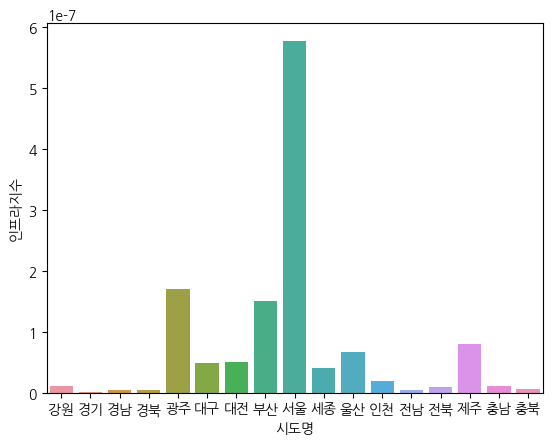

In [100]:
import seaborn as sns
import koreanize_matplotlib
sns.barplot(data=df_final, x='시도명', y='인프라지수');

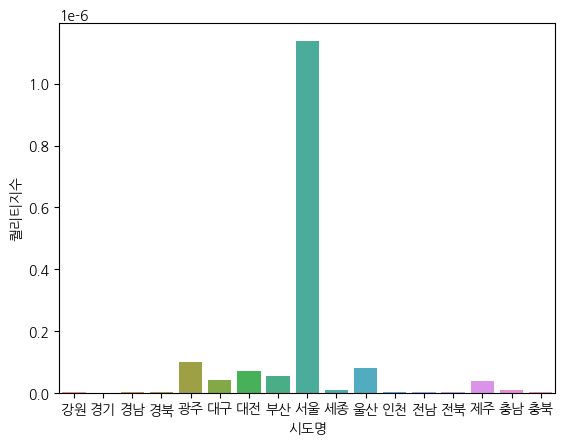

In [101]:
import seaborn as sns
import koreanize_matplotlib
sns.barplot(data=df_final, x='시도명', y='퀄리티지수');